In [1]:
%matplotlib inline
import os
import ElementsEnv

%erun SourceXtractorTools 0.1
import matplotlib.pyplot as plt
from Profiling import PlotRunProfile

In [19]:
def parse_logs(name, path):
    log = PlotRunProfile.read_sourcex_logs(os.path.join(path, f'sx_{name}.log'))
    pidstat = PlotRunProfile.read_pidstat(os.path.join(path, f'sx_{name}.pidstat'), ncores=16)
    return log, pidstat

In [20]:
devel_log, devel_pidstat = parse_logs('develop_16', '/home/aalvarez/Work/Data/SX/SxPerf/challenge/Output/EuclidChallenge/')

WARN    : not enough values to unpack (expected 5, got 0)
2021-10-01T17:45:00CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)


In [21]:
pyston_log, pyston_pidstat = parse_logs('pyston_16', '/home/aalvarez/Work/Data/SX/SxPerf/challenge/Output/EuclidChallengePyston/')

WARN    : not enough values to unpack (expected 5, got 0)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 0)
WARN    : not enough values to unpack (expected 5, got 2)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 2)
WARN    : not enough values to unpack (expected 5, got 2)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 2)
WARN    : not enough values to unpack (expected 5, got 1)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 1)
WARN    : not enough values to unpack (expected 5, got 2)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 2)
WARN    : not enough values to unpack (expected 5, got 2)
2021-10-01T17:45:01CEST Profiling.PlotRunProfile  WARN : not enough values to unpack (expected 5, got 2)
WARN    : not enough v

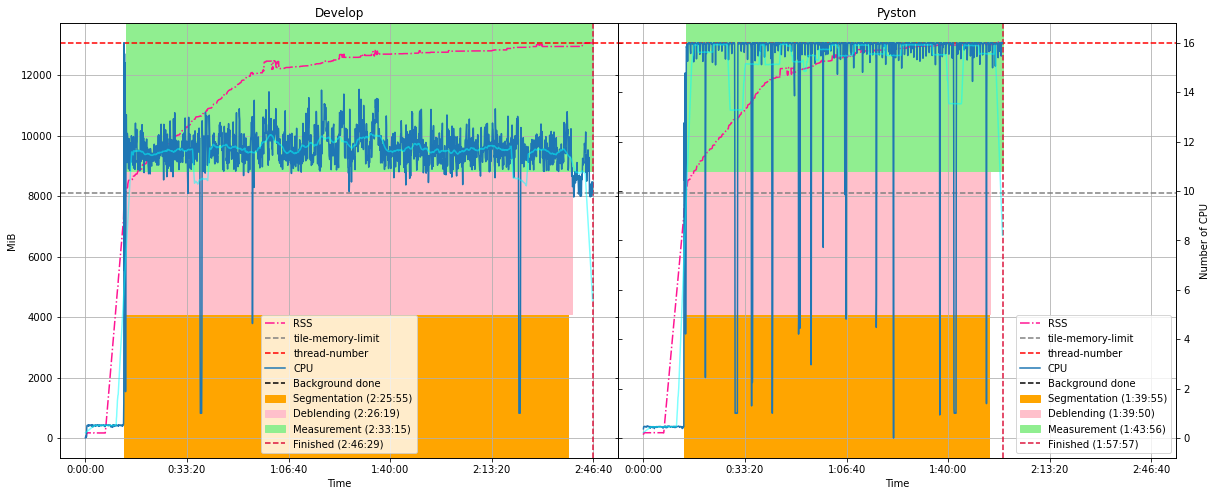

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.subplots_adjust(wspace=0)

PlotRunProfile.plot_perf(devel_pidstat, devel_log, ax=axes[0], y_left='memory', y_right='cpu', cpu_config=16)
axes[0].set_title('Develop')

PlotRunProfile.plot_perf(pyston_pidstat, pyston_log, ax=axes[1], y_left='memory', y_right='cpu', cpu_config=16)
axes[1].set_title('Pyston')

axes[1].sharex(axes[0])
axes[1].sharey(axes[0])
plt.setp(axes[1].get_yticklabels(), visible=False)
plt.setp(axes[1].get_yaxis().get_label(), visible=False)

ax0_mem = axes[0]._twinned_axes.get_siblings(axes[0])[1]
ax0_mem.sharey(axes[0]._twinned_axes.get_siblings(axes[1])[1])
plt.setp(ax0_mem.get_yticklabels(), visible=False)
plt.setp(ax0_mem.get_yaxis().get_label(), visible=False)

plt.savefig('/home/aalvarez/Downloads/yap.png', bbox_inches='tight', facecolor='white')
plt.show()